Raw Data:
   Year  Grand Total
0  2020        35937
1  2021        50319
2  2022        67315
3  2023        91153
4  2024       105017
Model Evaluation:
  R² Score: 0.9931
  RMSE: 2105.81


/home/miled/myenv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


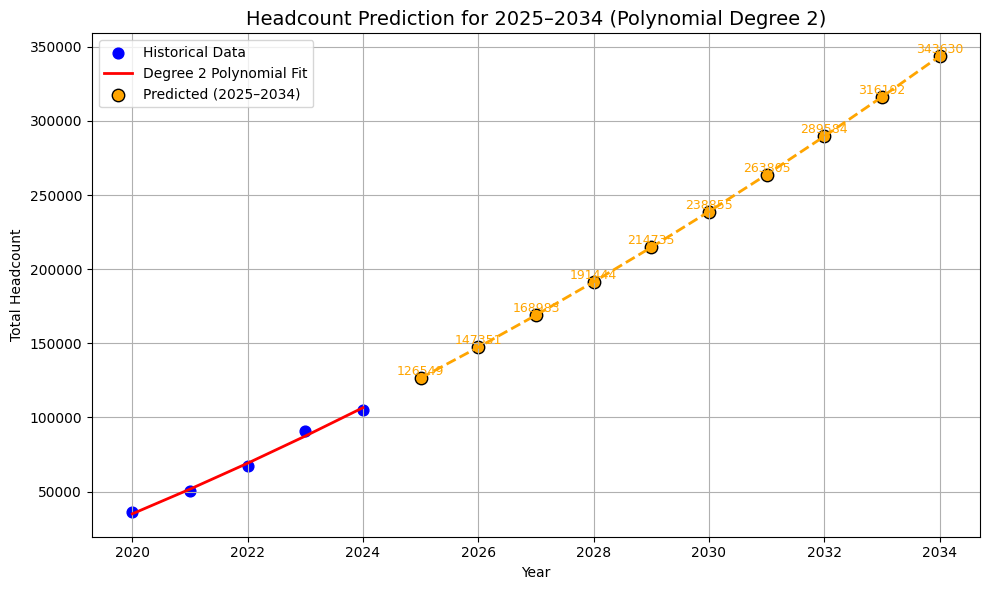

Forecasted Headcounts for 2025–2034:
   Year  Predicted Headcount
0  2025               126549
1  2026               147351
2  2027               168983
3  2028               191444
4  2029               214735
5  2030               238855
6  2031               263805
7  2032               289584
8  2033               316192
9  2034               343630
Saved to 'PolynomialDeg2_Headcount_2025_2034.csv'


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the Excel file
# Load the Exce file contating Yearly HeadCount data
df = pd.read_excel(r"Yearly Headcount.xlsx", sheet_name="Sheet1")

# Display the first few rows of the dataset to confirm the structure
print("Raw Data:")
print(df.head())

# Ensure 'Year' is numeric
df['Year'] = pd.to_numeric(df['Year'])
X = df[['Year']]
y = df['Grand Total']

# Polynomial regression (degree 2)
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

model = LinearRegression()
model.fit(X_poly, y)

# Evaluate model performance on training data
y_pred = model.predict(X_poly)
r2 = r2_score(y, y_pred)
rmse = np.sqrt(mean_squared_error(y, y_pred))

print(f"Model Evaluation:")
print(f"  R² Score: {r2:.4f}")
print(f"  RMSE: {rmse:.2f}")

# Forecast for 2025–2034
future_years = np.array(range(2025, 2035)).reshape(-1, 1)
future_years_poly = poly.transform(future_years)
future_predictions = model.predict(future_years_poly)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Historical Data', s=60)
plt.plot(X, y_pred, color='red', label='Degree 2 Polynomial Fit', linewidth=2)

plt.scatter(future_years, future_predictions, color='orange', label='Predicted (2025–2034)', s=80, edgecolor='black')
plt.plot(future_years, future_predictions, color='orange', linestyle='--', linewidth=2)

for year, prediction in zip(future_years.flatten(), future_predictions):
    plt.text(year, prediction, f'{int(prediction)}', fontsize=9, ha='center', va='bottom', color='orange')

plt.title('Headcount Prediction for 2025–2034 (Polynomial Degree 2)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Total Headcount')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Forecasted values
predicted_df = pd.DataFrame({
    'Year': future_years.flatten(),
    'Predicted Headcount': future_predictions.astype(int)
})
print("Forecasted Headcounts for 2025–2034:")
print(predicted_df)

# Save to CSV
predicted_df.to_csv("PolynomialDeg2_Headcount_2025_2034.csv", index=False)
print("Saved to 'PolynomialDeg2_Headcount_2025_2034.csv'")